In [1]:
%pip install langgraph
from typing import Dict,TypedDict
from langgraph.graph import StateGraph,START,END


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
class AgentState(TypedDict):
    num1:int
    operation:str
    num2:int
    result:int

In [11]:
def add_node(state:AgentState)->AgentState:
    """Node to add two numbers"""
    state["result"]=state["num1"]+state["num2"]
    return state
def sub_node(state:AgentState)->AgentState:
    """Node to subtract two numbers"""
    state["result"]=state["num1"]-state["num2"]
    return state
def conditional_node(state:AgentState)->str:
    """Conditional Node to choose operation"""
    if state["operation"]=="+":
        return "add"
    elif state["operation"]=="-":
        return "sub"

In [12]:
graph=StateGraph(AgentState)
graph.add_node("addition",add_node)
graph.add_node("subtraction",sub_node)
graph.add_node("condition",lambda state: state)
graph.add_edge(START,"condition")
graph.add_conditional_edges(
    "condition",conditional_node,{
        "add":"addition",
        "sub":"subtraction"
    }
)
graph.add_edge("addition",END)
graph.add_edge("subtraction",END)
app=graph.compile()

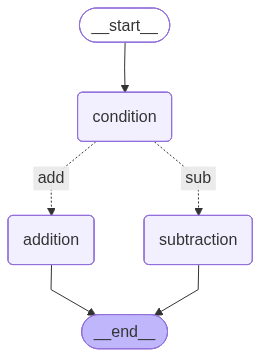

In [13]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
app.invoke({"num1":10,"operation":"+","num2":5})

{'num1': 10, 'operation': '+', 'num2': 5, 'result': 15}

In [16]:
app.invoke({"num1":10,"operation":"-","num2":5})

{'num1': 10, 'operation': '-', 'num2': 5, 'result': 5}